# **Final Project: Checkpoint 2**
(5 points) Data preprocessing: (a) import, (b) parse (e.g., convert strings to ints), (c) organize (e.g., set up a database or a pandas DataFrame).

(20 points) Basic data exploration and summary statistics
 - You must present three conclusions using at least three different statistical
methods including hypothesis testing.
    - For example: What are the main characteristics of your dataset? How
many features and entries are there? Is a feature over-represented? Are
features correlated? Are there outliers? Identify the attributes that will
affect your choice of primary analysis technique. Etcetera.
 - For each method, you must have at least one gorgeous plot.

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [3]:
# https://www.fec.gov/data/candidates/president/presidential-map/ 
# spending - allcandidates 
spending_df = pd.read_csv("spending_data.csv", index_col=False)
spending_df

/var/folders/y1/s43938x53_51bt1s4c8r9rlc0000gn/T/ipykernel_69486/2008950849.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  spending_df = pd.read_csv("spending_data.csv", index_col=False)


,cmte_id,cand_id,cand_nm,recipient_nm,disb_amt,disb_dt,recipient_city,recipient_st,recipient_zip,disb_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00540302,P40012155,"Scott, Timothy E.",THREE ARBOR INSURANCE INC,26630.07,31-AUG-23,VESTAVIA,AL,35243,INSURANCE,NaN,NaN,SB23,1731524,SB23.960154,P2024
1,C00540302,P40012155,"Scott, Timothy E.",THREE ARBOR INSURANCE INC,10342.13,15-SEP-23,VESTAVIA,AL,35243,INSURANCE,NaN,NaN,SB23,1731524,SB23.960155,P2024
2,C00540302,P40012155,"Scott, Timothy E.",WALMART,10.60,28-JUN-23,BENTONVILLE,AR,72716,OFFICE SUPPLIES,X,NaN,SB23,1731524,SB23.951080.003,P2024
3,C00540302,P40012155,"Scott, Timothy E.",WALMART,152.88,15-SEP-23,BENTONVILLE,AR,72716,OFFICE SUPPLIES,X,NaN,SB23,1731524,SB23.966491.284,P2024
4,C00540302,P40012155,"Scott, Timothy E.",WALMART,218.00,15-SEP-23,BENTONVILLE,AR,72716,OFFICE SUPPLIES,X,NaN,SB23,1731524,SB23.966491.285,P2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112107,C00867812,P40019218,"Terry, Randal Allan",MOUNT JACKSON TRUCK CENTER,219.11,29-JUL-24,MOUNT JACKSON,VA,22842,FOOD/SHOWERS,NaN,NaN,SB23,1812531,SB23.6419,G2024
112108,C00867812,P40019218,"Terry, Randal Allan",SWEETWATER TAVERN,215.41,08-AUG-24,CENTREVILLE,WA,20121,FOOD,NaN,NaN,SB23,1816947,SB23.6524,G2024
112109,C00867812,P40019218,"Terry, Randal Allan","GABRIEL, MARK",153.75,30-JUN-24,APPLETON,WI,54915,FUND RAISING,NaN,NaN,SB23,1804884,SB23.5890,G2024
112110,C00867812,P40019218,"Terry, Randal Allan","GABRIEL, MARK",316.25,01-AUG-24,APPLETON,WI,54915,FUNDRAISING,NaN,NaN,SB23,1816947,SB23.6464,G2024


In [4]:
# data from all candidates 
# downloaded from https://www.fec.gov/data/browse-data/?tab=bulk-data 
# All candiates 2023-2024
pd.read_csv("weball24.txt", delimiter='|')

,CAND_ID,CAND_NAME,CAND_ICI,PTY_CD,CAND_PTY_AFFILIATION,TTL_RECEIPTS,TRANS_FROM_AUTH,TTL_DISB,TRANS_TO_AUTH,COH_BOP,...,SPEC_ELECTION,PRIM_ELECTION,RUN_ELECTION,GEN_ELECTION,GEN_ELECTION_PRECENT,OTHER_POL_CMTE_CONTRIB,POL_PTY_CONTRIB,CVG_END_DT,INDIV_REFUNDS,CMTE_REFUNDS
0,H2AK00200,"CONSTANT, CHRISTOPHER",C,1,DEM,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,09/30/2024,0.00,0.00
1,H2AK01158,"PELTOLA, MARY",I,1,DEM,10668705.84,617668.60,8324352.37,0.00,691260.30,...,NaN,NaN,NaN,NaN,NaN,1385214.20,7208.83,09/30/2024,112286.11,2500.00
2,H2AK00226,"PALIN, SARAH",O,2,REP,3866.49,0.00,50246.07,0.00,46379.58,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,03/31/2023,-9152.50,0.00
3,H2AK01083,"BEGICH, NICHOLAS III",C,2,REP,1789869.45,112470.80,1390345.73,17659.66,41233.99,...,NaN,NaN,NaN,NaN,NaN,117050.00,5000.00,09/30/2024,10535.00,0.00
4,H4AK00156,"DAHLSTROM, NANCY",C,2,REP,982395.15,423333.44,781568.25,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,262916.02,0.00,09/30/2024,3135.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3792,S4WV00423,"LINDSAY, DONALD",O,2,REP,9792.33,0.00,9792.33,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,06/30/2024,0.00,0.00
3793,S4WY00188,"MORROW, SCOTT D MR",C,1,DEM,36054.82,0.00,4439.65,2200.00,0.00,...,NaN,NaN,NaN,NaN,NaN,5000.00,1000.00,09/30/2024,0.00,0.00
3794,S0WY00137,"LUMMIS, CYNTHIA MARIE MRS.",I,2,REP,546175.07,111073.95,195781.29,5000.00,115856.76,...,NaN,NaN,NaN,NaN,NaN,220084.83,0.00,09/30/2024,8850.00,0.00
3795,S4WY00162,"RASNER, REID",C,2,REP,1304150.64,0.00,1294697.64,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,09/30/2024,0.00,0.00


In [17]:
cross = pd.crosstab(spending_df['disb_desc'], spending_df[(spending_df['cand_nm'] == 'Harris, Kamala') | (spending_df['cand_nm'] == 'Trump, Donald J.')]['cand_nm'])
cross


cand_nm,"Harris, Kamala","Trump, Donald J."
disb_desc,,
ACCOUNTING SERVICES,19,0
ADMINISTRATIVE CONSULTING,29,0
ADMINISTRATIVE SERVICES,10,0
ADVANCE CONSULTING,0,72
ADVANCE CONSULTING & PER DIEM,0,686
...,...,...
VOTER GUIDE FEE,1,0
WEBSITE DEVELOPMENT,2,0
WEBSITE HOSTING,19,0


In [19]:
scipy.stats.chi2_contingency(cross).pvalue

0.0

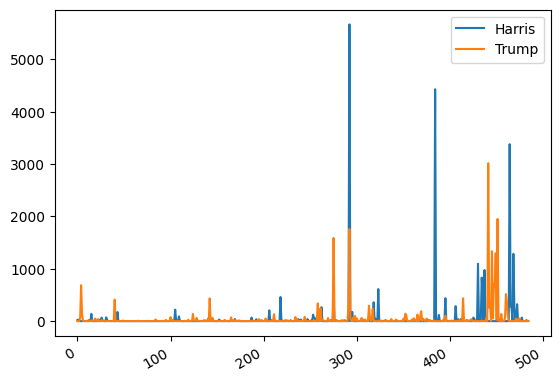

In [24]:
fig, ax = plt.subplots()

line_yes, = ax.plot(cross['Harris, Kamala'].to_list(), label='Harris')
line_no, = ax.plot(cross['Trump, Donald J.'].to_list(), label='Trump')
# ax.set_xticks(range(len(cross.index)), list(cross.index), size='small')
fig.autofmt_xdate()
# handles, labels = ax.get_legend_handles_labels()
ax.legend(handles = [line_yes, line_no])
plt.show()